In [4]:
import statsmodels.api as sm

import pandas as pd

from patsy import dmatrices

In [5]:
import seaborn as sns

In [6]:
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("fund-raising.csv")

In [8]:
df.head()

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age,gender
0,4.0,12,10,2.0,15,7.0,5.0,4.066667,10,8801,9404,62,F
1,5.0,3,14,3.0,21,6.0,5.0,4.857143,5,9312,9404,66,F
2,13.0,21,5,5.0,12,17.0,10.0,11.000000,0,9001,9503,69,F
3,10.0,6,8,5.0,10,12.0,12.0,9.400000,10,9209,9509,73,M
4,10.0,7,2,10.0,3,15.0,10.0,11.666667,0,9511,9508,58,F


In [9]:
df.describe()

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,15.294594,7.819020,6.570029,5.607259,12.337752,18.079767,14.802810,11.161954,4.438617,9208.485303,9409.360519,62.634870
std,11.557829,6.298072,4.772860,4.425180,9.083041,21.340950,10.848921,6.899647,10.843211,262.632888,191.525862,15.753199
min,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,2.260870,0.000000,8608.000000,8312.000000,4.000000
25%,10.000000,4.000000,3.000000,3.000000,6.000000,11.000000,10.000000,7.100000,0.000000,9007.000000,9401.000000,50.000000
50%,13.000000,6.000000,6.000000,5.000000,10.000000,15.000000,14.000000,9.894444,1.000000,9210.000000,9504.000000,64.000000
75%,20.000000,10.000000,9.000000,5.000000,16.000000,20.000000,20.000000,13.196875,5.000000,9410.000000,9511.000000,75.000000
max,200.000000,77.000000,29.000000,80.000000,91.000000,1000.000000,250.000000,103.571429,240.000000,9702.000000,9702.000000,98.000000


In [10]:
df['mailord'].unique()

array([ 10,   5,   0,  15,  13,  12,   7,   6,   2,   1,   4,  20,   3,
         8,   9,  31,  16,  19,  17,  14,  24,  23,  11,  21,  46,  26,
        25,  22,  42,  33,  18,  30,  53, 240,  28,  37,  59,  36,  29,
        39,  34,  49,  27,  45,  35,  43,  32,  40,  38,  44,  61],
      dtype=int64)

In [11]:
df['contrib'].unique()

array([  4.  ,   5.  ,  13.  ,  10.  ,  20.  ,  16.  ,  26.  ,   7.  ,
         3.  ,  60.  ,  15.  ,  23.  ,   6.  ,  11.  ,  16.87,   2.5 ,
        50.  ,  10.7 ,  35.  ,  14.  ,  21.  ,   2.  ,  12.  ,  25.  ,
        19.  ,  40.  ,  38.  ,  18.  ,  17.  ,  12.5 ,   7.5 ,   1.  ,
         9.  ,  36.  ,   8.  ,  30.  ,  22.  ,  24.  ,  41.  ,  51.  ,
        28.  ,  43.  ,  31.  , 100.  ,  32.  ,  33.  ,  45.  ,  47.  ,
        37.  ,  18.25,  27.  ,  13.92,  46.  , 200.  ,  44.  ,  75.  ,
        53.  ,  29.  ,  17.5 ,  34.  ,   4.5 ,  42.  ,  55.  , 102.  ])

In [12]:
df['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   contrib     3470 non-null   float64
 1   gapmos      3470 non-null   int64  
 2   promocontr  3470 non-null   int64  
 3   mincontrib  3470 non-null   float64
 4   ncontrib    3470 non-null   int64  
 5   maxcontrib  3470 non-null   float64
 6   lastcontr   3470 non-null   float64
 7   avecontr    3470 non-null   float64
 8   mailord     3470 non-null   int64  
 9   mindate     3470 non-null   int64  
 10  maxdate     3470 non-null   int64  
 11  age         3470 non-null   int64  
 12  gender      3470 non-null   object 
dtypes: float64(5), int64(7), object(1)
memory usage: 352.5+ KB


In [14]:
corr = df.corr()

In [15]:
corr

,contrib,gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
contrib,1.000000,0.112192,-0.214586,0.407175,-0.211630,0.414476,0.746451,0.663092,0.018597,-0.065409,0.131160,-0.025829
gapmos,0.112192,1.000000,-0.122663,0.101264,-0.138969,0.043845,0.109052,0.120501,0.024835,-0.086470,0.011983,-0.032028
promocontr,-0.214586,-0.122663,1.000000,-0.377991,0.897084,-0.043710,-0.194761,-0.289574,0.006408,-0.364224,-0.393935,0.196177
mincontrib,0.407175,0.101264,-0.377991,1.000000,-0.370177,0.237322,0.441218,0.703515,-0.003198,0.278263,0.087067,-0.089005
ncontrib,-0.211630,-0.138969,0.897084,-0.370177,1.000000,0.026248,-0.193359,-0.268200,0.002570,-0.305664,-0.389773,0.199914
maxcontrib,0.414476,0.043845,-0.043710,0.237322,0.026248,1.000000,0.514442,0.535534,0.029185,-0.056513,-0.006831,0.021743
lastcontr,0.746451,0.109052,-0.194761,0.441218,-0.193359,0.514442,1.000000,0.766460,0.044186,-0.103314,0.158253,-0.025513
avecontr,0.663092,0.120501,-0.289574,0.703515,-0.268200,0.535534,0.766460,1.000000,0.029075,0.027796,0.037038,-0.050179
mailord,0.018597,0.024835,0.006408,-0.003198,0.002570,0.029185,0.044186,0.029075,1.000000,0.010814,0.013036,0.108515
mindate,-0.065409,-0.086470,-0.364224,0.278263,-0.305664,-0.056513,-0.103314,0.027796,0.010814,1.000000,0.134658,-0.145311


<AxesSubplot:>

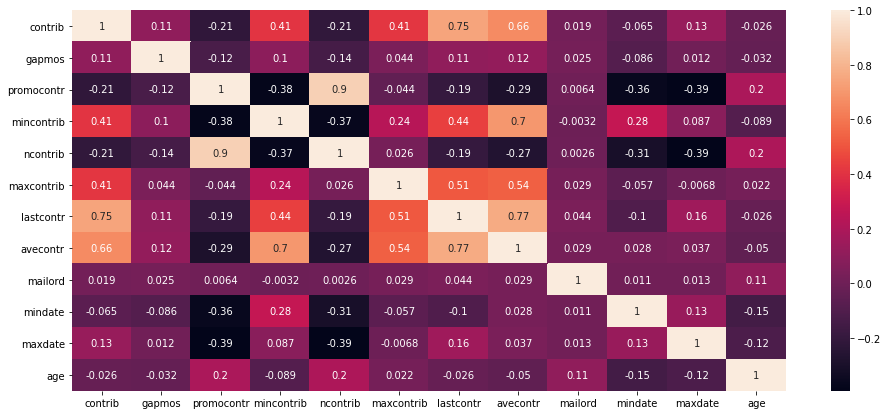

In [16]:
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [11]:
df.columns

Index(['contrib', 'gapmos', 'promocontr', 'mincontrib', 'ncontrib',
       'maxcontrib', 'lastcontr', 'avecontr', 'mailord', 'mindate', 'maxdate',
       'age', 'gender'],
      dtype='object')

# Model 1 - Using all predictors

In [12]:
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')

In [13]:
X.head()

,Intercept,gender[T.M],gender[T.U],gapmos,promocontr,mincontrib,ncontrib,maxcontrib,lastcontr,avecontr,mailord,mindate,maxdate,age
0,1.0,0.0,0.0,12.0,10.0,2.0,15.0,7.0,5.0,4.066667,10.0,8801.0,9404.0,62.0
1,1.0,0.0,0.0,3.0,14.0,3.0,21.0,6.0,5.0,4.857143,5.0,9312.0,9404.0,66.0
2,1.0,0.0,0.0,21.0,5.0,5.0,12.0,17.0,10.0,11.000000,0.0,9001.0,9503.0,69.0
3,1.0,1.0,0.0,6.0,8.0,5.0,10.0,12.0,12.0,9.400000,10.0,9209.0,9509.0,73.0
4,1.0,0.0,0.0,7.0,2.0,10.0,3.0,15.0,10.0,11.666667,0.0,9511.0,9508.0,58.0


In [14]:
y.head()

,contrib
0,4.0
1,5.0
2,13.0
3,10.0
4,10.0


In [15]:
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     368.5
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:09:07   Log-Likelihood:                -11907.
No. Observations:                3470   AIC:                         2.384e+04
Df Residuals:                    3456   BIC:                         2.393e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0676      8.918      0.120      

In [16]:
res.rsquared_adj

0.5793132026110206

## Model 2 - Using only 2 predictors

In [17]:
y, X = dmatrices('contrib  ~  lastcontr + avecontr', 
                 data=df, return_type='dataframe')

In [18]:
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2367.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:22:16   Log-Likelihood:                -11922.
No. Observations:                3470   AIC:                         2.385e+04
Df Residuals:                    3467   BIC:                         2.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0653      0.244      8.465      0.0

In [20]:
## Model 3 - Using only 1 predictor

In [21]:
y, X = dmatrices('contrib  ~  lastcontr ', 
                 data=df, return_type='dataframe')

In [22]:
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                contrib   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     4364.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:24:13   Log-Likelihood:                -12002.
No. Observations:                3470   AIC:                         2.401e+04
Df Residuals:                    3468   BIC:                         2.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5230      0.221     15.947      0.0

# SKLEARN - Linear Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
y, X = dmatrices('contrib  ~ gapmos + promocontr + mincontrib + ncontrib + \
                 maxcontrib + lastcontr + avecontr + mailord + mindate + maxdate +age + gender', 
                 data=df, return_type='dataframe')

In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=0)

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(xTrain,yTrain)

LinearRegression()

## Do the Prediction using the Test Data

In [46]:
yPrediction = lr.predict(xTest)

In [56]:
type(yPrediction)

numpy.ndarray

In [57]:
type(yTest)

pandas.core.frame.DataFrame

In [62]:
df_pred = pd.DataFrame(yPrediction,columns=['Prediction'])


In [63]:
df_pred.head()

,Prediction
0,13.547525
1,15.068066
2,24.082522
3,8.736275
4,15.199548


### JOin the actual and prediction into a signel Dataframe

In [105]:
df_compare = pd.concat([yTest.reset_index(),df_pred],axis=1)

In [106]:
df_compare.shape

(1041, 3)

In [110]:
df_compare.drop('index', axis=1).head()

,contrib,Prediction
0,16.0,13.547525
1,12.0,15.068066
2,20.0,24.082522
3,13.0,8.736275
4,15.0,15.199548


In [108]:
print(yTest.shape)
print(yPrediction.shape)

(1041, 1)
(1041, 1)


In [109]:
print(df_compare.shape)

(1041, 3)


[]

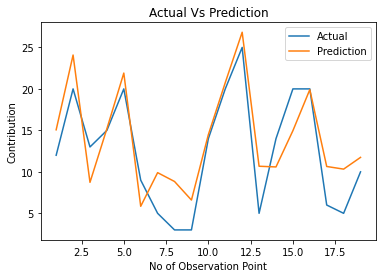

In [103]:
plt.plot(df_compare['contrib'][1:20])
plt.plot(df_compare['Prediction'][1:20])
plt.xlabel("No of Observation Point")
plt.ylabel("Contribution")
plt.title("Actual Vs Prediction")
plt.legend(['Actual', 'Prediction'])
plt.plot()